<a href="https://colab.research.google.com/github/minalang/study/blob/main/210707_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit learn 
scikit learn cheat sheet의 basic example 실습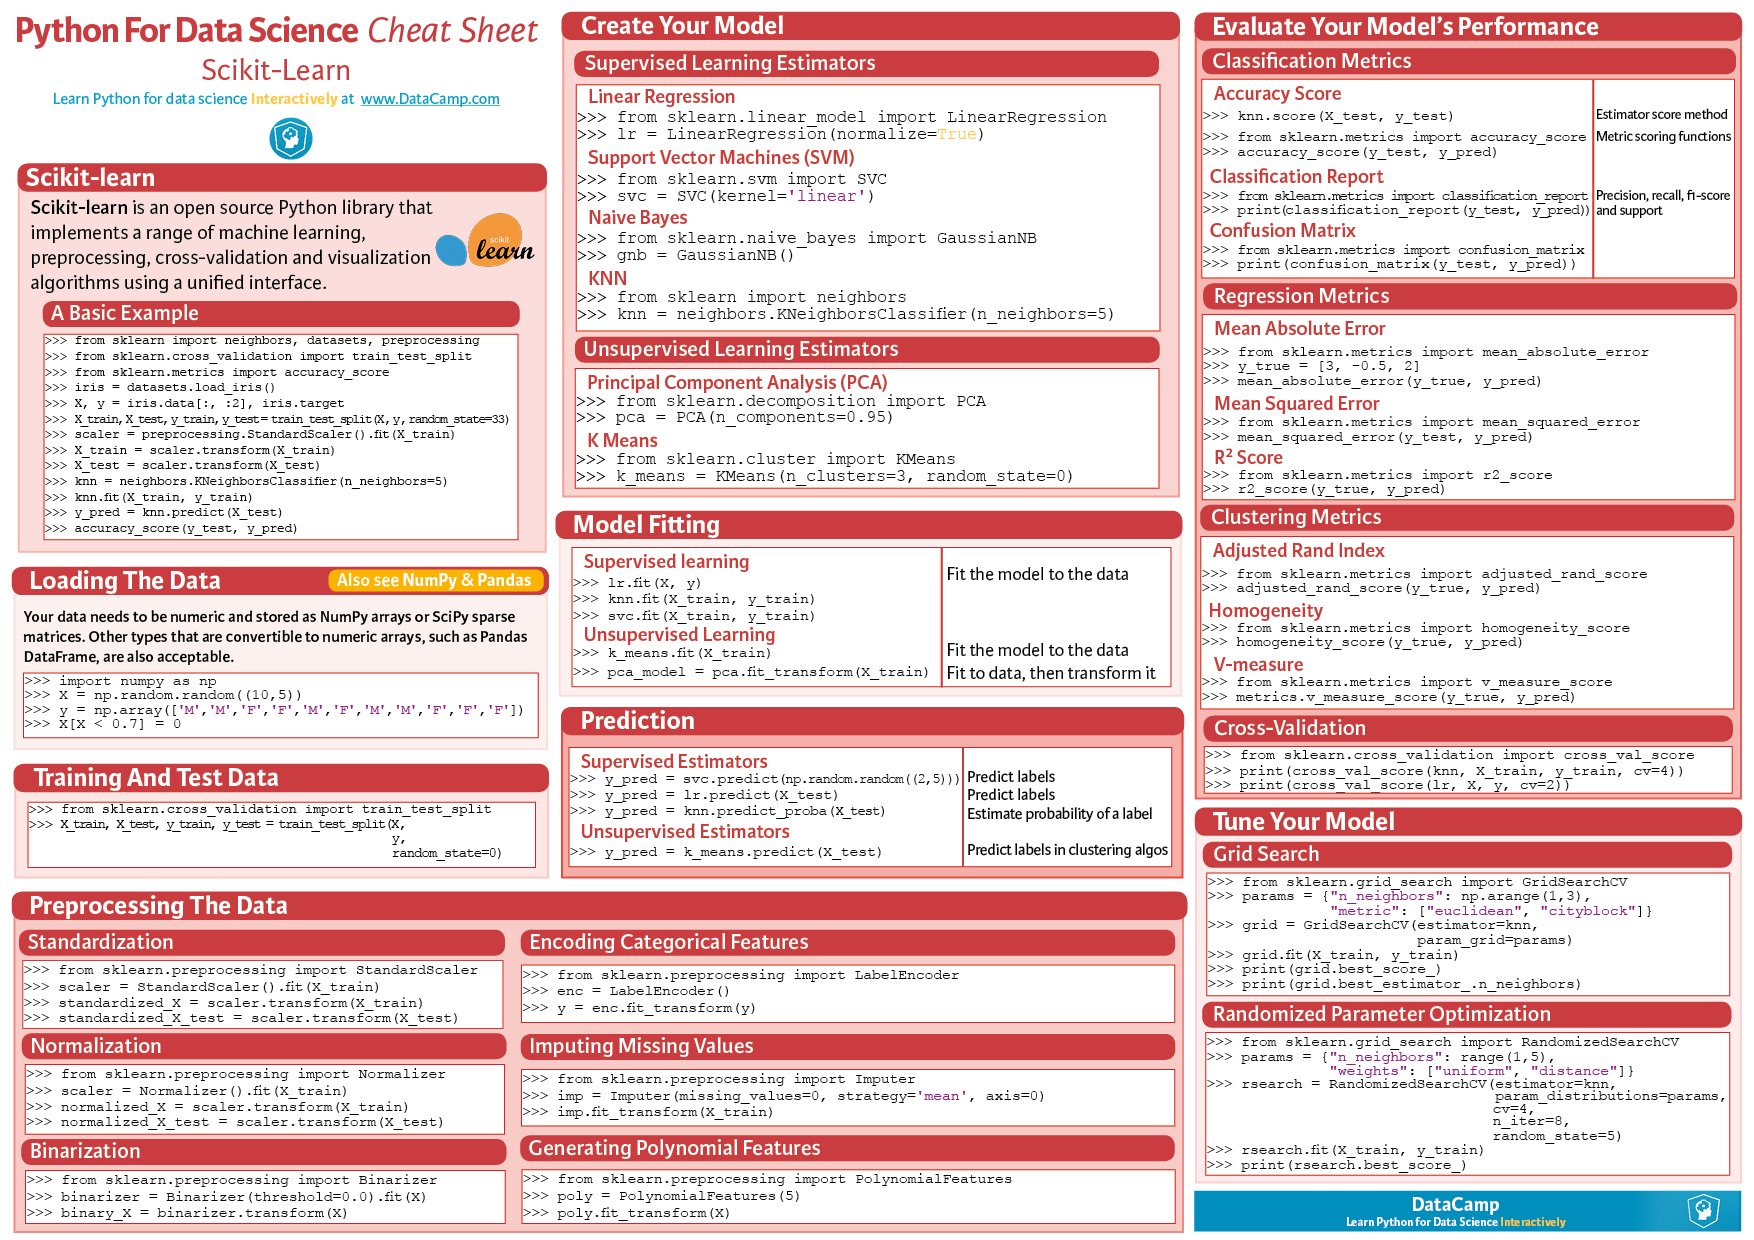

In [ ]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)

# scikit learn scaler
## 1. StandardScaler
평균을 제거하고 데이터를 단위 분산으로 조정한다. 그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.

따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(train_data))
train_data_standardScaled = standardScaler.transform(train_data)


## 2. MinMaxScaler
모든 feature 값이 0~1사이에 있도록 데이터를 재조정한다. 다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.

즉, MinMaxScaler 역시 아웃라이어의 존재에 매우 민감하다.

from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(train_data))
train_data_minMaxScaled = minMaxScaler.transform(train_data)


## 3. MaxAbsScaler
절대값이 0과 1사이에 매핑되도록 한다. 즉 -1~1 사이로 재조정한다. 양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있다.

from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
print(maxAbsScaler.fit(train_data))
train_data_maxAbsScaled = maxAbsScaler.transform(train_data)


4. RobustScaler
아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.

IQR = Q3 - Q1 : 즉, 25퍼센타일과 75퍼센타일의 값들을 다룬다.

아웃라이어를 포함하는 데이터의 표준화 결과는 아래와 같다.

출처: https://mkjjo.github.io/python/2019/01/10/scaler.html 

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5) #knn classifier사용한다
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.631578947368421